In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


This file uses titanic.csv data file which containts the data of passengers traveling in the titanic ship and the information whether they survived or not.

In [5]:
titanic = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will first drop categorical features to clean the data and observe the numeric data to identify a trend between survival and the numerical features.

In [6]:
cat_feat = ['PassengerId' ,  'Name' , 'Sex' ,'Ticket' , 'Cabin' , 'Embarked']
titanic.drop(cat_feat , axis = 1 , inplace = True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


When we run titanic.describe(), it gives us information about the data, min, max mean etc. If we observe the count, then we find that the count for the age is 714 where as there are total 891 rows in the data. This means that there are some rows in the data where there is no value for the age.

In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We group the data based on survived and not survived to carry out basic statistical analysis.

We find the mean values of different factors for people that either survived or died. If we observe the mean values then there are somethings to note. For example: it shows that the people who didn't survive belon mostly on average to 2nd class or third class or they had paid less fare or had higher number of siblings.

In [8]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


Now, We group the data by age to see if there are null values. By running the below code we can observe that the passengers whose age is not included(null) belong to either 2nd class or 3rd class and had paid a less fare of 22$ on average.

In [9]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


# Plotting Continous Features

The below graph gives an idea of how age and fare relate to survival. The first graph shows the effect of age and second shows the effect of fare against survived or didn't survive.

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


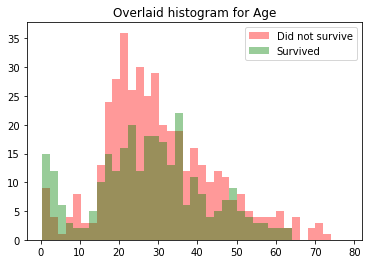

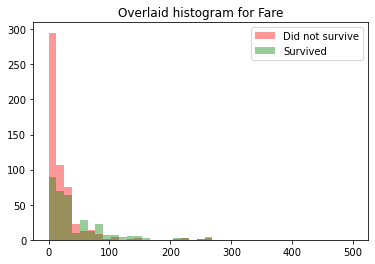

In [10]:
for i in ['Age','Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived']==1][i].dropna())
    xmin = min(min(died),min(survived))
    xmax = max(max(died),max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color ='r', kde =False, bins=np.arange(xmin,xmax,width))
    sns.distplot(survived,color = 'g' , kde = False , bins = np.arange(xmin,xmax,width))
    plt.legend(['Did not survive','Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

The below given graph compares the survival rate with the ticket class, number of siblings and parents. 

The first graph shows that the people who belonged to 1st class has higher survival chance then the people from the 3rd class.
The second graph shows survival rate decreases as the number of siblings increases.
The third graph shows that those who has parents or children were less likely to survive.

NOTE: The verticle line shows the confidence.

<Figure size 432x288 with 0 Axes>

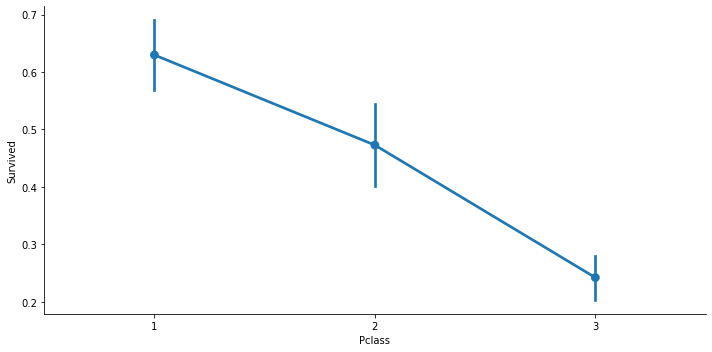

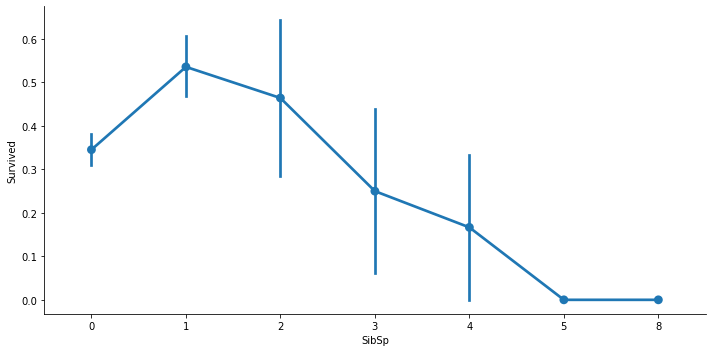

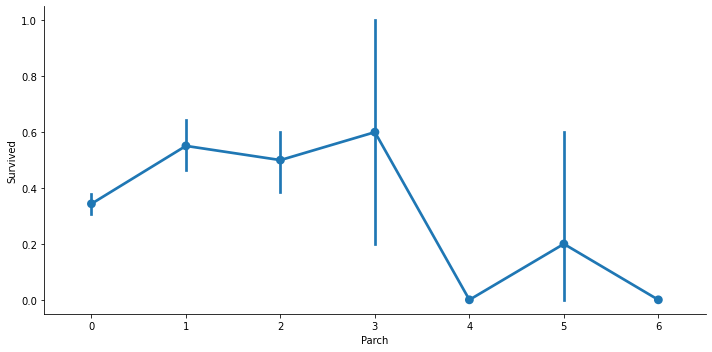

In [11]:
for i,col in enumerate(['Pclass' , 'SibSp' , 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point',aspect=2,)
    

# Cleaning the data

We will add values for age where age is null. We will add the average age for the null values.

In [12]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

To clean the data we will merge the Sibsp and Parch values to give us clean data and name it as total family member. After merging these columns, we will drop the original columns.

In [13]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp','Parch'], axis = 1, inplace=True)
titanic.head()

,Survived,Pclass,Age,Fare,Family_cnt
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [14]:
titanic = pd.read_csv('C:/Users/mannn/OneDrive/Desktop/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring categorical data

We Will drop all continous features to study the categorical data and analyse it to find its relationship with survival.

In [15]:
cont_feat = ['PassengerId' ,  'Pclass' , 'Name' ,'Age' , 'SibSp' , 'Parch','Fare']
titanic.drop(cont_feat , axis = 1 , inplace = True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


We will now explore sex, cabin and embarked features to study its relation.

If we look at the non null count of the titanic data, it is observed that the cabin has a lot of null values and embarked has 2 null values.

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


If we look at the grouped values below, it shows us that 66% people survived out of the people who had a cabin value but only 30% survived out of the total who didn't have a cabin value. 

In [17]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [18]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)
titanic.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


# Plot categorical features

From the plots below we can conclude:

1. People without cabins had lower survival rate than the ones that had cabin
2. Female's survival rate is higher than the Male
3. The peope who boarded in Cherbourg ('C') had a higher survival rate than other embarking destinations.


By looking at the plot it may be tempting to believe that people from the Cherbourg has a higher chance of survival but it may be the case that other factors are at play here, maybe more females boarded from cherbourg or more people with cabin boarded from Cherbourg. Thus it is unlikely that from where they boarded played a role in their survival.

<Figure size 432x288 with 0 Axes>

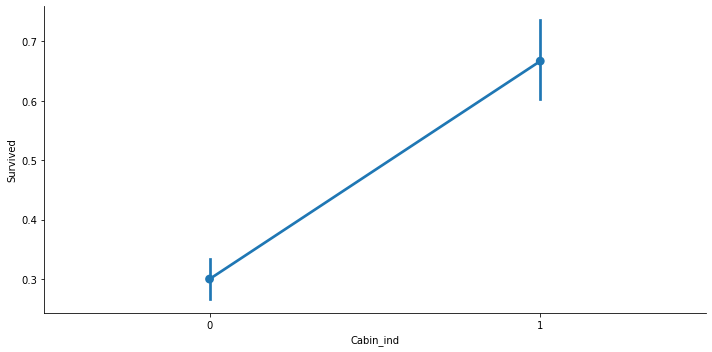

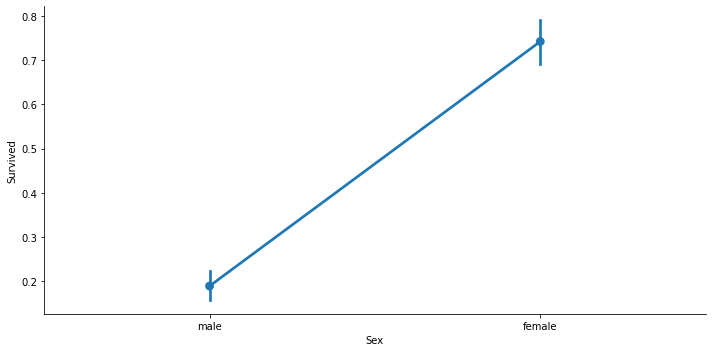

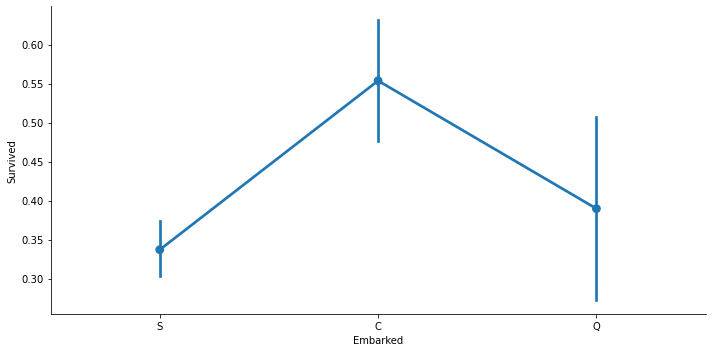

In [19]:
for i, col in enumerate(['Cabin_ind','Sex','Embarked']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2,)
    

From the code below it's clear that more female boarded in Cherbourgh thus the survival rate of Cherbourgh is higher than South Hampton as there are more male, and we have seen that survival rate of male is much less than female.

In [20]:
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


From the code below it's clear that more people from Cherbourgh had cabin thus the survival rate of Cherbourgh is higher than South Hampton as there are more people with no cabin, and we have seen that survival rate of people with cabin is much higher than people with no cabin.

Thus we can say that the boarding location has no relation with the survival rate.

In [21]:
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


From above codes it is seen that sex and cabin has a strong correlation with the survival rate then the embarking location.

# Categorical Data Cleaning

In [22]:
titanic = pd.read_csv('C:/Users/mannn/OneDrive/Desktop/titanic.csv')
titanic.drop(['Name','Ticket'],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


We are converting the sex field to numeric values.

In [23]:
gender_num = {'male': 0,'female':1}

titanic['Sex']=titanic['Sex'].map(gender_num)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,71.2833,C85,C
2,3,1,3,1,26.0,0,0,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,53.1000,C123,S
4,5,0,3,0,35.0,0,0,8.0500,NaN,S


In [24]:
titanic.drop(['Embarked','PassengerId'],axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,0,22.0,1,0,7.2500,NaN
1,1,1,1,38.0,1,0,71.2833,C85
2,1,3,1,26.0,0,0,7.9250,NaN
3,1,1,1,35.0,1,0,53.1000,C123
4,0,3,0,35.0,0,0,8.0500,NaN


In [25]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Family_cnt']=titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)
titanic.drop(['Cabin'],axis=1,inplace=True)
titanic.head()
titanic.to_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/titanic_clean.csv',index=False)


Now, are data has all the numerical values which makes it easy to analyze.

# Spliting data for training, validation and testing.

Split data as follows:

60% Training
20% validation
20% Testing

In [26]:
from sklearn.model_selection import train_test_split
titanic = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/titanic_clean.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [27]:
features = titanic.drop('Survived',axis=1)
labels = titanic['Survived']

x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [28]:
print(len(labels),len(y_train),len(y_val),len(y_test))

for dataset in [y_train,y_val,y_test]:
    print(round(len(dataset)/len(labels),2))

891 534 179 178
0.6
0.2
0.2


In [29]:
x_train.to_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/train_features.csv', index=False)
x_val.to_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/val_features.csv', index=False)
x_test.to_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/test_features.csv', index=False)

y_train.to_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/train_labels.csv', index=False)
y_val.to_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/val_labels.csv', index=False)
y_test.to_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/test_labels.csv', index=False)


# Pipeline

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

tr_features = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/train_features.csv')
tr_labels = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/train_labels.csv')

In [31]:
rf = RandomForestClassifier()

scores = cross_val_score(rf , tr_features, tr_labels, cv=5)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

In [32]:
scores

array([0.81308411, 0.8317757 , 0.79439252, 0.79439252, 0.82075472])

In [33]:
from sklearn.model_selection import GridSearchCV


In [34]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [35]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.779 (+/-0.146) for {'max_depth': 2, 'n_estimators': 5}
0.781 (+/-0.13) for {'max_depth': 2, 'n_estimators': 50}
0.792 (+/-0.113) for {'max_depth': 2, 'n_estimators': 100}
0.815 (+/-0.109) for {'max_depth': 10, 'n_estimators': 5}
0.828 (+/-0.069) for {'max_depth': 10, 'n_estimators': 50}
0.818 (+/-0.05) for {'max_depth': 10, 'n_estimators': 100}
0.775 (+/-0.062) for {'max_depth': 20, 'n_estimators': 5}
0.807 (+/-0.025) for {'max_depth': 20, 'n_estimators': 50}
0.803 (+/-0.033) for {'max_depth': 20, 'n_estimators': 100}
0.805 (+/-0.037) for {'max_depth': None, 'n_estimators': 5}
0.805 (+/-0.032) for {'max_depth': None, 'n_estimators': 50}
0.807 (+/-0.029) for {'max_depth': None, 'n_estimators': 100}


In [36]:

from sklearn.metrics import accuracy_score, precision_score, recall_score

tr_features = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/train_features.csv')
tr_labels = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/train_labels.csv')

val_features = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/val_features.csv')
val_labels = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/val_labels.csv')

te_features = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/test_features.csv')
te_labels = pd.read_csv('C:/Users/mannn/Downloads/Ex_Files_Applied_Machine_Learning/project file/test_labels.csv')

In [37]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf2.fit(tr_features, tr_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(tr_features, tr_labels.values.ravel())

RandomForestClassifier()

In [38]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 5 -- A: 0.816 / P: 0.812 / R: 0.737
MAX DEPTH: 10 / # OF EST: 100 -- A: 0.821 / P: 0.844 / R: 0.711
MAX DEPTH: None / # OF EST: 100 -- A: 0.804 / P: 0.789 / R: 0.737


In [39]:
y_pred = rf2.predict(te_features)
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred), 3)
recall = round(recall_score(te_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.792 / P: 0.75 / R: 0.646
